In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from decimal import *
pd.options.display.max_columns = 100

In [3]:
df_meets = pd.read_csv('openpowerlifting.csv')
df_meets = df_meets.drop(['Squat4Kg', 'Squat3Kg', 'Squat2Kg', 'Squat1Kg', 'Division', 'Event',
                          'Bench4Kg', 'Bench3Kg', 'Bench2Kg', 'Bench1Kg', 'AgeClass', 
                          'Deadlift4Kg', 'Deadlift3Kg', 'Deadlift2Kg', 'Deadlift1Kg'], axis=1)

C:\Users\dnly\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_tested_meets = df_meets[df_meets['Tested']=='Yes']

In [5]:
df_tested_meets = df_tested_meets[np.isfinite(df_tested_meets['Best3SquatKg'])]
df_tested_meets = df_tested_meets[np.isfinite(df_tested_meets['Best3BenchKg'])]
df_tested_meets = df_tested_meets[np.isfinite(df_tested_meets['Best3DeadliftKg'])]
df_tested_meets = df_tested_meets.dropna()

In [6]:
multi_ath_dict = df_tested_meets['Name'].value_counts().to_dict()
multi_ath_dict = {k:v for k, v in multi_ath_dict.items() if v > 1}

In [7]:
df_data = df_tested_meets[df_tested_meets['Name'].isin(list(multi_ath_dict.keys()))]

In [8]:
df_data['Best3SquatKg_Allo'] = df_data['Best3SquatKg'] * df_data['BodyweightKg'] ** (-2/3)
df_data['Best3BenchKg_Allo'] = df_data['Best3BenchKg'] * df_data['BodyweightKg'] ** (-2/3)
df_data['Best3DeadliftKg_Allo'] = df_data['Best3DeadliftKg'] * df_data['BodyweightKg'] ** (-2/3)
df_data['TotalKg_Allo'] = df_data['TotalKg'] * df_data['BodyweightKg'] ** (-2/3)

df_data['Best3SquatKg_BW'] = df_data['Best3SquatKg'] / df_data['BodyweightKg']
df_data['Best3BenchKg_BW'] = df_data['Best3BenchKg'] / df_data['BodyweightKg']
df_data['Best3DeadliftKg_BW'] = df_data['Best3DeadliftKg'] / df_data['BodyweightKg']
df_data['TotalKg_BW'] = df_data['TotalKg'] / df_data['BodyweightKg']

C:\Users\dnly\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\dnly\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\dnly\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

In [9]:
#removing 2.5% from both the lowest and highest competitors from the dataset (outliers)
df_data = df_data[np.abs(df_data.TotalKg_Allo-df_data.TotalKg_Allo.mean()) <= (2*df_data.TotalKg_Allo.std())]

In [10]:
#df_data.to_csv('cleaned_openpowerlifting.csv')

C:\Users\dnly\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

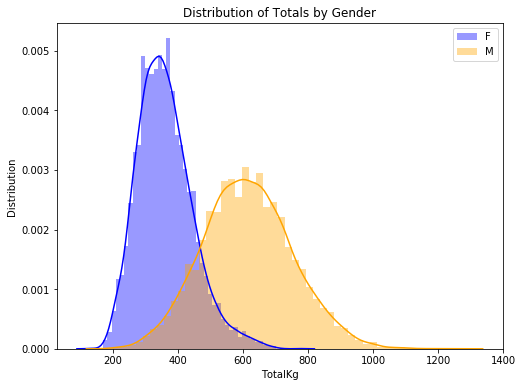

In [11]:
plt.figure()
# plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,6));
sns.distplot(df_data['TotalKg'][df_data['Sex']=='F'], color='blue', label='F')
sns.distplot(df_data['TotalKg'][df_data['Sex']=='M'], color='orange', label='M')
plt.title('Distribution of Totals by Gender')
plt.ylabel('Distribution')
plt.xlabel('TotalKg')
plt.legend()
plt.show()

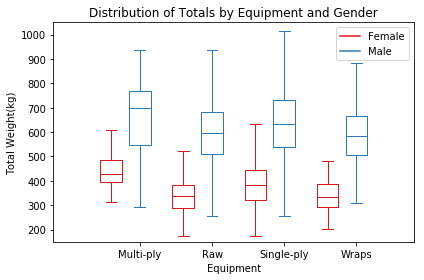

In [12]:
#data to plot
A = df_data['TotalKg'][df_data['Equipment']=='Multi-ply'][df_data['Sex']=='F']
B = df_data['TotalKg'][df_data['Equipment']=='Multi-ply'][df_data['Sex']=='M']
C = df_data['TotalKg'][df_data['Equipment']=='Raw'][df_data['Sex']=='F']
D = df_data['TotalKg'][df_data['Equipment']=='Raw'][df_data['Sex']=='M']
E = df_data['TotalKg'][df_data['Equipment']=='Single-ply'][df_data['Sex']=='F']
F = df_data['TotalKg'][df_data['Equipment']=='Single-ply'][df_data['Sex']=='M']
G = df_data['TotalKg'][df_data['Equipment']=='Wraps'][df_data['Sex']=='F']
H = df_data['TotalKg'][df_data['Equipment']=='Wraps'][df_data['Sex']=='M']

#data
data_a = [A, C, E, G]#[[1,2,5], [5,7,2,2,5], [7,2,5]]
data_b = [B, D, F, H]#[[6,4,2], [1,2,5,3,2], [2,3,5,1]]

ticks = ['Multi-ply', 'Raw', 'Single-ply', 'Wraps']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure()

bpl = plt.boxplot(data_a, positions=np.array(range(len(data_a)))*2.0-0.4, sym='', widths=0.6)
bpr = plt.boxplot(data_b, positions=np.array(range(len(data_b)))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Female')
plt.plot([], c='#2C7BB6', label='Male')
plt.title('Distribution of Totals by Equipment and Gender')
plt.ylabel('Total Weight(kg)')
plt.xlabel('Equipment')
plt.xticks([0.4, 2.4, 4.4, 6.4], ticks)
plt.xlim(-2, 8)
plt.ylim(150, 1050)
plt.tight_layout()
plt.legend()

C:\Users\dnly\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

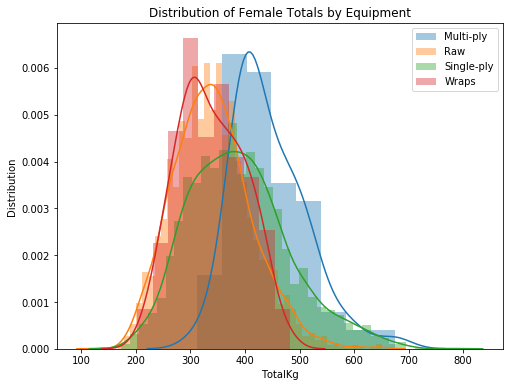

In [13]:
plt.figure()
plt.figure(figsize=(8,6));
sns.distplot(df_data['TotalKg'][df_data['Equipment']=='Multi-ply'][df_data['Sex']=='F'], label='Multi-ply')
sns.distplot(df_data['TotalKg'][df_data['Equipment']=='Raw'][df_data['Sex']=='F'], label='Raw')
sns.distplot(df_data['TotalKg'][df_data['Equipment']=='Single-ply'][df_data['Sex']=='F'], label='Single-ply')
sns.distplot(df_data['TotalKg'][df_data['Equipment']=='Wraps'][df_data['Sex']=='F'], label='Wraps')
plt.title('Distribution of Female Totals by Equipment')
plt.ylabel('Distribution')
plt.xlabel('TotalKg')
plt.legend()
plt.show()

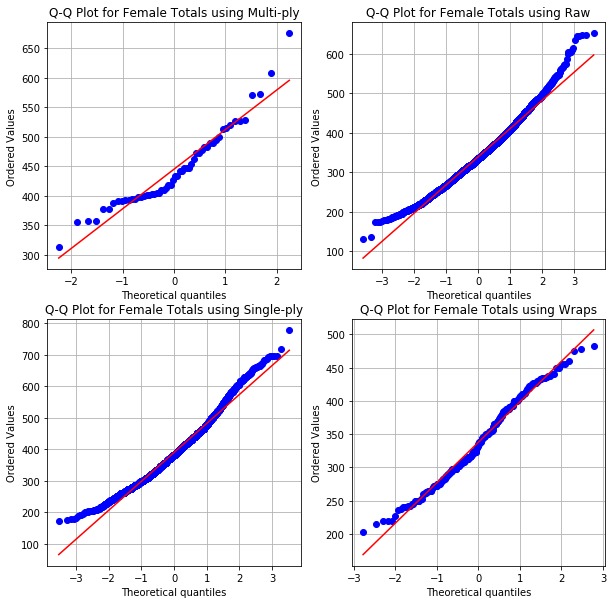

In [14]:
grid = plt.GridSpec(2, 2)
grid.update(wspace = 2, hspace = 3)
plt.figure(figsize=(10,10));

plt.subplot2grid((2,2), (0,0))
stats.probplot(df_data['TotalKg'][df_data['Equipment']=='Multi-ply'][df_data['Sex']=='F'], dist="norm", plot=pylab)
plt.title('Q-Q Plot for Female Totals using Multi-ply')
plt.grid()

plt.subplot2grid((2,2), (0,1))
stats.probplot(df_data['TotalKg'][df_data['Equipment']=='Raw'][df_data['Sex']=='F'], dist="norm", plot=pylab)
plt.title('Q-Q Plot for Female Totals using Raw')
plt.grid()

plt.subplot2grid((2,2), (1,0))
stats.probplot(df_data['TotalKg'][df_data['Equipment']=='Single-ply'][df_data['Sex']=='F'], dist="norm", plot=pylab)
plt.title('Q-Q Plot for Female Totals using Single-ply')
plt.grid()

plt.subplot2grid((2,2), (1,1))
stats.probplot(df_data['TotalKg'][df_data['Equipment']=='Wraps'][df_data['Sex']=='F'], dist="norm", plot=pylab)
plt.title('Q-Q Plot for Female Totals using Wraps')
plt.grid()

C:\Users\dnly\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

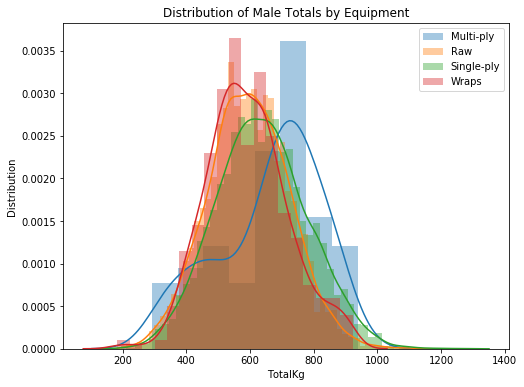

In [15]:
plt.figure()
plt.figure(figsize=(8,6))
sns.distplot(df_data['TotalKg'][df_data['Equipment']=='Multi-ply'][df_data['Sex']=='M'], label='Multi-ply')
sns.distplot(df_data['TotalKg'][df_data['Equipment']=='Raw'][df_data['Sex']=='M'], label='Raw')
sns.distplot(df_data['TotalKg'][df_data['Equipment']=='Single-ply'][df_data['Sex']=='M'], label='Single-ply')
sns.distplot(df_data['TotalKg'][df_data['Equipment']=='Wraps'][df_data['Sex']=='M'], label='Wraps')
plt.title('Distribution of Male Totals by Equipment')
plt.ylabel('Distribution')
plt.xlabel('TotalKg')
plt.legend()
plt.show()

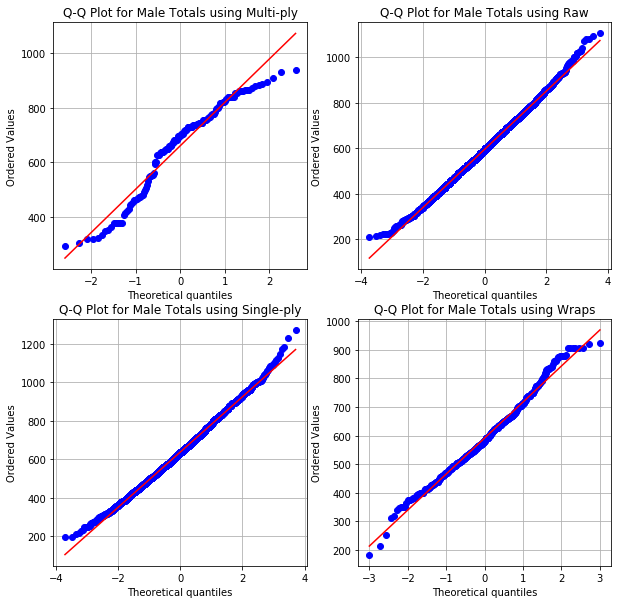

In [16]:
grid = plt.GridSpec(2, 2)
grid.update(wspace = 2, hspace = 3)
plt.figure(figsize=(10,10));

plt.subplot2grid((2,2), (0,0))
stats.probplot(df_data['TotalKg'][df_data['Equipment']=='Multi-ply'][df_data['Sex']=='M'], dist="norm", plot=pylab)
plt.title('Q-Q Plot for Male Totals using Multi-ply')
plt.grid()

plt.subplot2grid((2,2), (0,1))
stats.probplot(df_data['TotalKg'][df_data['Equipment']=='Raw'][df_data['Sex']=='M'], dist="norm", plot=pylab)
plt.title('Q-Q Plot for Male Totals using Raw')
plt.grid()

plt.subplot2grid((2,2), (1,0))
stats.probplot(df_data['TotalKg'][df_data['Equipment']=='Single-ply'][df_data['Sex']=='M'], dist="norm", plot=pylab)
plt.title('Q-Q Plot for Male Totals using Single-ply')
plt.grid()

plt.subplot2grid((2,2), (1,1))
stats.probplot(df_data['TotalKg'][df_data['Equipment']=='Wraps'][df_data['Sex']=='M'], dist="norm", plot=pylab)
plt.title('Q-Q Plot for Male Totals using Wraps')
plt.grid()

In [17]:
df_data2 = df_data[(df_data['Equipment']=='Raw') | (df_data['Equipment']=='Wraps')]

C:\Users\dnly\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

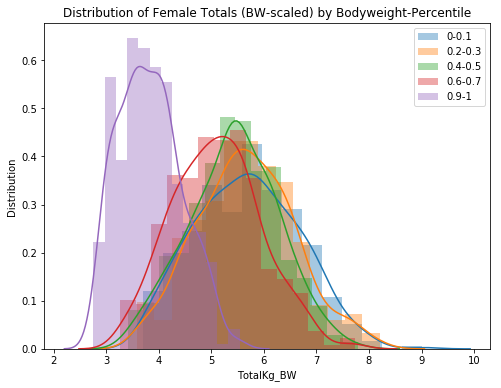

In [31]:
df_data2f = df_data2[df_data2['Sex']=='F'].sort_values(by='BodyweightKg')
df_data2f_1_10 = df_data2f.iloc[:int(round(0.1*len(df_data2f))),:]
df_data2f_2_10 = df_data2f.iloc[int(round(0.1*len(df_data2f))):int(round(0.2*len(df_data2f))),:]
df_data2f_3_10 = df_data2f.iloc[int(round(0.2*len(df_data2f))):int(round(0.3*len(df_data2f))),:]
df_data2f_4_10 = df_data2f.iloc[int(round(0.3*len(df_data2f))):int(round(0.4*len(df_data2f))),:]
df_data2f_5_10 = df_data2f.iloc[int(round(0.4*len(df_data2f))):int(round(0.5*len(df_data2f))),:]
df_data2f_6_10 = df_data2f.iloc[int(round(0.5*len(df_data2f))):int(round(0.6*len(df_data2f))),:]
df_data2f_7_10 = df_data2f.iloc[int(round(0.6*len(df_data2f))):int(round(0.7*len(df_data2f))),:]
df_data2f_8_10 = df_data2f.iloc[int(round(0.7*len(df_data2f))):int(round(0.8*len(df_data2f))),:]
df_data2f_9_10 = df_data2f.iloc[int(round(0.8*len(df_data2f))):int(round(0.9*len(df_data2f))),:]
df_data2f_10_10 = df_data2f.iloc[int(round(0.9*len(df_data2f))):int(round(len(df_data2f))),:]

plt.figure()
plt.figure(figsize=(8,6))
sns.distplot(df_data2f_1_10['TotalKg_BW'], label='0-0.1')
# sns.distplot(df_data2f_2_10['TotalKg_BW'], label='0.1-0.2')
sns.distplot(df_data2f_3_10['TotalKg_BW'], label='0.2-0.3')
# sns.distplot(df_data2f_4_10['TotalKg_BW'], label='0.3-0.4')
sns.distplot(df_data2f_5_10['TotalKg_BW'], label='0.4-0.5')
# sns.distplot(df_data2f_6_10['TotalKg_BW'], label='0.5-0.6')
sns.distplot(df_data2f_7_10['TotalKg_BW'], label='0.6-0.7')
# sns.distplot(df_data2f_8_10['TotalKg_BW'], label='0.7-0.8')
# sns.distplot(df_data2f_9_10['TotalKg_BW'], label='0.8-0.9')
sns.distplot(df_data2f_10_10['TotalKg_BW'], label='0.9-1')
plt.title('Distribution of Female Totals (BW-scaled) by Bodyweight-Percentile')
plt.ylabel('Distribution')
plt.xlabel('TotalKg_BW')
plt.legend()
plt.show()

In [39]:
datalist = []
for i in ([df_data2f_1_10, df_data2f_2_10, df_data2f_3_10, df_data2f_4_10, df_data2f_5_10,
           df_data2f_6_10, df_data2f_7_10, df_data2f_8_10, df_data2f_9_10, df_data2f_10_10]):
    datalist.append([i['TotalKg_BW'].min(), i['TotalKg_BW'].mean(),
                     i['TotalKg_BW'].max(), i['TotalKg_BW'].std()])
df_f_stats = pd.DataFrame(datalist)
df_f_stats.columns = ['min','mean','max','std']
df_f_stats.index = ['0-0.1','0.1-0.2','0.2-0.3','0.3-0.4','0.4-0.5','0.5-0.6','0.6-0.7','0.7-0.8','0.8-0.9','0.9-1']


C:\Users\dnly\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

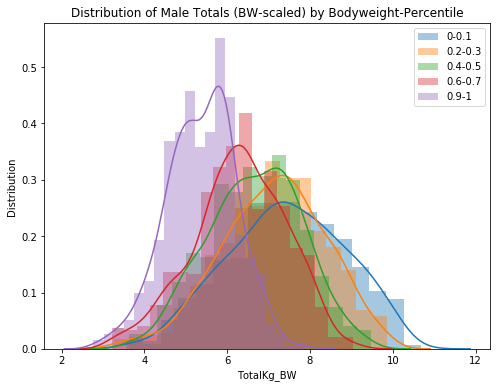

In [36]:
df_data2m = df_data2[df_data2['Sex']=='M'].sort_values(by='BodyweightKg')
df_data2m_1_10 = df_data2m.iloc[:int(round(0.1*len(df_data2m))),:]
df_data2m_2_10 = df_data2m.iloc[int(round(0.1*len(df_data2m))):int(round(0.2*len(df_data2m))),:]
df_data2m_3_10 = df_data2m.iloc[int(round(0.2*len(df_data2m))):int(round(0.3*len(df_data2m))),:]
df_data2m_4_10 = df_data2m.iloc[int(round(0.3*len(df_data2m))):int(round(0.4*len(df_data2m))),:]
df_data2m_5_10 = df_data2m.iloc[int(round(0.4*len(df_data2m))):int(round(0.5*len(df_data2m))),:]
df_data2m_6_10 = df_data2m.iloc[int(round(0.5*len(df_data2m))):int(round(0.6*len(df_data2m))),:]
df_data2m_7_10 = df_data2m.iloc[int(round(0.6*len(df_data2m))):int(round(0.7*len(df_data2m))),:]
df_data2m_8_10 = df_data2m.iloc[int(round(0.7*len(df_data2m))):int(round(0.8*len(df_data2m))),:]
df_data2m_9_10 = df_data2m.iloc[int(round(0.8*len(df_data2m))):int(round(0.9*len(df_data2m))),:]
df_data2m_10_10 = df_data2m.iloc[int(round(0.9*len(df_data2m))):int(round(len(df_data2m))),:]

plt.figure()
plt.figure(figsize=(8,6))
sns.distplot(df_data2m_1_10['TotalKg_BW'], label='0-0.1')
# sns.distplot(df_data2m_2_10['TotalKg_BW'], label='0.1-0.2')
sns.distplot(df_data2m_3_10['TotalKg_BW'], label='0.2-0.3')
# sns.distplot(df_data2m_4_10['TotalKg_BW'], label='0.3-0.4')
sns.distplot(df_data2m_5_10['TotalKg_BW'], label='0.4-0.5')
# sns.distplot(df_data2m_6_10['TotalKg_BW'], label='0.5-0.6')
sns.distplot(df_data2m_7_10['TotalKg_BW'], label='0.6-0.7')
# sns.distplot(df_data2m_8_10['TotalKg_BW'], label='0.7-0.8')
# sns.distplot(df_data2m_9_10['TotalKg_BW'], label='0.8-0.9')
sns.distplot(df_data2m_10_10['TotalKg_BW'], label='0.9-1')
plt.title('Distribution of Male Totals (BW-scaled) by Bodyweight-Percentile')
plt.ylabel('Distribution')
plt.xlabel('TotalKg_BW')
plt.legend()
plt.show()

In [21]:
datalist = []
for i in ([df_data2m_1_10, df_data2m_2_10, df_data2m_3_10, df_data2m_4_10, df_data2m_5_10,
           df_data2m_6_10, df_data2m_7_10, df_data2m_8_10, df_data2m_9_10, df_data2m_10_10]):
    datalist.append([i['TotalKg_BW'].min(), i['TotalKg_BW'].mean(),
                     i['TotalKg_BW'].max(), i['TotalKg_BW'].std()])
df_m_stats = pd.DataFrame(datalist)
df_m_stats.columns = ['min','mean','max','std']
df_m_stats.index = ['0-0.1','0.1-0.2','0.2-0.3','0.3-0.4','0.4-0.5','0.5-0.6','0.6-0.7','0.7-0.8','0.8-0.9','0.9-1']
df_m_stats

,min,mean,max,std
0-0.1,3.554502,7.420018,10.686275,1.413494
0.1-0.2,3.701165,7.137291,9.862069,1.133387
0.2-0.3,3.260168,7.111043,9.850543,1.260512
0.3-0.4,3.148148,7.006254,9.457985,1.134817
0.4-0.5,3.627232,6.668688,9.480676,1.127255
0.5-0.6,3.222222,6.702998,9.093377,1.085780
0.6-0.7,3.210313,6.297026,9.048799,1.117830
0.7-0.8,3.007700,6.292479,8.523271,0.946379
0.8-0.9,3.221649,5.880469,8.276435,0.934739
0.9-1,2.767102,5.377419,7.911647,0.836786


In [22]:
m1 = df_data2m_1_10[df_data2m_1_10.TotalKg == df_data2m_1_10.TotalKg.max()]
m3 = df_data2m_3_10[df_data2m_3_10.TotalKg == df_data2m_3_10.TotalKg.max()]
m5 = df_data2m_5_10[df_data2m_5_10.TotalKg == df_data2m_5_10.TotalKg.max()]
m7 = df_data2m_7_10[df_data2m_7_10.TotalKg == df_data2m_7_10.TotalKg.max()]
m10 = df_data2m_10_10[df_data2m_10_10.TotalKg == df_data2m_10_10.TotalKg.max()]
# f1 = df_data2f_1_10.sample(1)
# f3 = df_data2f_3_10.sample(1)
# f5 = df_data2f_5_10.sample(1)
# f7 = df_data2f_7_10.sample(1)
# f10 = df_data2f_10_10.sample(1)
df_sample = pd.concat([m1, m3, m5, m7, m10])#, f1, f3, f5, f7, f10])

selected_metrics = ['Sex', 'BodyweightKg',
                    'TotalKg', 'TotalKg_BW', 'TotalKg_Allo']
#                     'Best3BenchKg', 'Best3BenchKg_BW', 'Best3BenchKg_Allo']#,
#                     'Best3SquatKg', 'Best3SquatKg_BW', 'Best3SquatKg_Allo']
#                     'Best3DeadliftKg', 'Best3DeadliftKg_BW', 'Best3DeadliftKg_Allo']
df_sample[df_sample.columns.intersection(selected_metrics)]

,Sex,BodyweightKg,TotalKg,TotalKg_Allo,TotalKg_BW
598446,M,65.88,672.5,41.227775,10.207954
598711,M,65.88,672.5,41.227775,10.207954
594925,M,80.40,735.0,39.456326,9.141791
595261,M,80.40,735.0,39.456326,9.141791
624023,M,88.40,817.5,41.195798,9.247738
271398,M,101.60,860.0,39.497473,8.464567
271536,M,182.26,1105.0,34.374366,6.062767


In [23]:
df_data2m_1_10[df_data2m_1_10.Best3BenchKg == df_data2m_1_10.Best3BenchKg.max()]

,Name,Sex,Equipment,Age,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Place,Wilks,McCulloch,Tested,Country,Glossbrenner,Federation,Date,MeetCountry,MeetState,MeetName,Best3SquatKg_Allo,Best3BenchKg_Allo,Best3DeadliftKg_Allo,TotalKg_Allo,Best3SquatKg_BW,Best3BenchKg_BW,Best3DeadliftKg_BW,TotalKg_BW
86084,Daniel Remulla,M,Raw,26.5,65.6,66,217.5,169.0,247.5,634.0,2,500.32,500.32,Yes,Canada,485.75,CPU,2018-02-19,Canada,AB,Canadian Championship,13.371805,10.390046,15.216192,38.978043,3.315549,2.57622,3.772866,9.664634


C:\Users\dnly\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

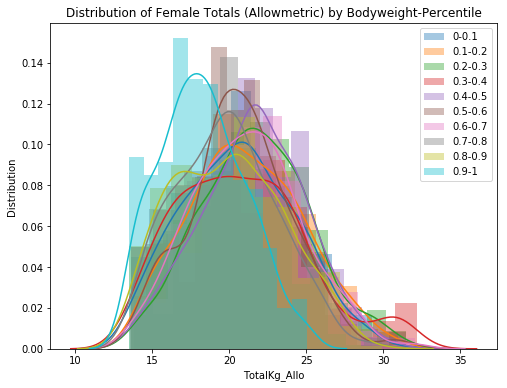

In [24]:
plt.figure()
plt.figure(figsize=(8,6))
sns.distplot(df_data2f_1_10['TotalKg_Allo'], label='0-0.1')
sns.distplot(df_data2f_2_10['TotalKg_Allo'], label='0.1-0.2')
sns.distplot(df_data2f_3_10['TotalKg_Allo'], label='0.2-0.3')
sns.distplot(df_data2f_4_10['TotalKg_Allo'], label='0.3-0.4')
sns.distplot(df_data2f_5_10['TotalKg_Allo'], label='0.4-0.5')
sns.distplot(df_data2f_6_10['TotalKg_Allo'], label='0.5-0.6')
sns.distplot(df_data2f_7_10['TotalKg_Allo'], label='0.6-0.7')
sns.distplot(df_data2f_8_10['TotalKg_Allo'], label='0.7-0.8')
sns.distplot(df_data2f_9_10['TotalKg_Allo'], label='0.8-0.9')
sns.distplot(df_data2f_10_10['TotalKg_Allo'], label='0.9-1')
plt.title('Distribution of Female Totals (Allowmetric) by Bodyweight-Percentile')
plt.ylabel('Distribution')
plt.xlabel('TotalKg_Allo')
plt.legend()
plt.show()

In [25]:
datalist = []
for i in ([df_data2f_1_10, df_data2f_2_10, df_data2f_3_10, df_data2f_4_10, df_data2f_5_10,
           df_data2f_6_10, df_data2f_7_10, df_data2f_8_10, df_data2f_9_10, df_data2f_10_10]):
    datalist.append([i['TotalKg_Allo'].min(), i['TotalKg_Allo'].mean(),
                     i['TotalKg_Allo'].max(), i['TotalKg_Allo'].std()])
df_f_stats = pd.DataFrame(datalist)
df_f_stats.columns = ['min','mean','max','std']
df_f_stats.index = ['0-0.1','0.1-0.2','0.2-0.3','0.3-0.4','0.4-0.5','0.5-0.6','0.6-0.7','0.7-0.8','0.8-0.9','0.9-1']
df_f_stats

,min,mean,max,std
0-0.1,13.612772,20.602475,31.845256,3.614416
0.1-0.2,13.580727,21.135438,30.964320,3.670382
0.2-0.3,13.780305,21.672313,31.459640,3.516837
0.3-0.4,13.581578,20.779910,32.163839,4.173027
0.4-0.5,13.593711,21.558738,30.924640,3.359489
0.5-0.6,13.551435,20.728980,32.492385,3.297284
0.6-0.7,13.533048,21.119421,32.045522,3.485481
0.7-0.8,13.582098,19.790340,29.900400,3.256089
0.8-0.9,13.466520,19.935839,29.915023,3.569614
0.9-1,13.455559,18.247850,25.054163,2.728360


# Bonus content

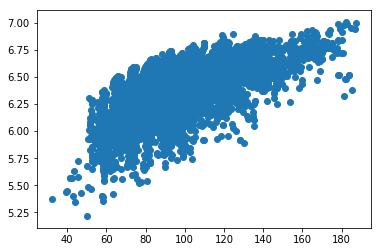

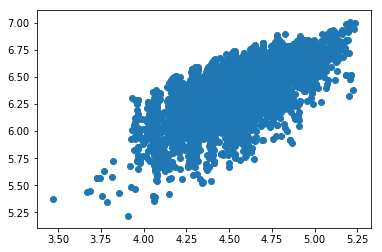

In [26]:
plt.figure()
plt.scatter(df_data2m.BodyweightKg, np.log(df_data2m.TotalKg))
plt.show()

plt.figure()
plt.scatter(np.log(df_data2m.BodyweightKg), np.log(df_data2m.TotalKg))
plt.show()

In [27]:
(sm.OLS(df_data2m.TotalKg,df_data2m.BodyweightKg).fit()).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                TotalKg   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                 2.071e+05
Date:                Fri, 26 Oct 2018   Prob (F-statistic):               0.00
Time:                        12:52:53   Log-Likelihood:                -48476.
No. Observations:                7849   AIC:                         9.695e+04
Df Residuals:                    7848   BIC:                         9.696e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
BodyweightKg     6.2953      0.014    455.059      0.000       6.268       6.322
==============================================================================
Omnibus:                      414.782   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              490.090
Skew:                          -0.568   Prob(JB):                    3.79e-107
Kurtosis:                       3.455   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
(sm.OLS(np.log(df_data2m.TotalKg),np.log(df_data2m.BodyweightKg)).fit()).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                TotalKg   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 4.820e+06
Date:                Fri, 26 Oct 2018   Prob (F-statistic):               0.00
Time:                        12:52:53   Log-Likelihood:                -466.33
No. Observations:                7849   AIC:                             934.7
Df Residuals:                    7848   BIC:                             941.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
BodyweightKg     1.4127      0.001   2195.539      0.000       1.411       1.414
==============================================================================
Omnibus:                      159.322   Durbin-Watson:                   0.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.868
Skew:                          -0.359   Prob(JB):                     2.14e-37
Kurtosis:                       2.960   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
#work in progress
df_agg = pd.concat([df_data['TotalKg'][df_data['Equipment']=='Multi-ply'][df_data['Sex']=='F'],
                    df_data['TotalKg'][df_data['Equipment']=='Raw'][df_data['Sex']=='F'],
                    df_data['TotalKg'][df_data['Equipment']=='Single-ply'][df_data['Sex']=='F'],
                    df_data['TotalKg'][df_data['Equipment']=='Wraps'][df_data['Sex']=='F']], axis=1)
df_agg['constant 1'] = 'Multi-ply'
df_agg['constant 2'] = 'Raw'
df_agg['constant 3'] = 'Single-ply'
df_agg['constant 4'] = 'Wraps'
# a = pd.concat([df_agg[['constant 1']], df_agg[['Multi-ply']]], axis=1)
# a.columns = ['Equipment', 'TotalKg']
# b = pd.concat([df_agg[['constant 2']], df_agg[['Raw']]], axis=1)
# b.columns = ['Equipment', 'TotalKg']
# c = pd.concat([df_agg[['constant 3']], df_agg[['Single-ply']]], axis=1)
# c.columns = ['Equipment', 'TotalKg']
# d = pd.concat([df_agg[['constant 4']], df_agg[['Wraps']]], axis=1)
# d.columns = ['Equipment', 'TotalKg']
                    
# e = pd.concat([a, b, c], axis=0)

In [30]:
##########
# Fitting the data -- Least Squares Method
##########

# Power-law fitting is best done by first converting
# to a linear equation and then fitting to a straight line.
# Note that the `logyerr` term here is ignoring a constant prefactor.
#
#  y = a * x^b
#  log(y) = log(a) + b*log(x)
#

logx = np.log10(df_data2m.BodyweightKg)
logy = np.log10(df_data2m.TotalKg)
yerr = 0.2 * ydata
logyerr = yerr / ydata

# define our (line) fitting function
fitfunc = lambda p, x: p[0] + p[1] * x
errfunc = lambda p, x, y, err: (y - fitfunc(p, x)) / err

pinit = [1.0, -1.0]
out = optimize.leastsq(errfunc, pinit,
                       args=(logx, logy, logyerr), full_output=1)

pfinal = out[0]
covar = out[1]
print pfinal
print covar

index = pfinal[1]
amp = 10.0**pfinal[0]

indexErr = np.sqrt( covar[1][1] )
ampErr = np.sqrt( covar[0][0] ) * amp

##########
# Plotting data
##########

plt.clf()
plt.subplot(2, 1, 1)
plt.plot(xdata, powerlaw(xdata, amp, index))     # Fit
plt.errorbar(xdata, ydata, yerr=yerr, fmt='k.')  # Data
plt.text(5, 6.5, 'Ampli = %5.2f +/- %5.2f' % (amp, ampErr))
plt.text(5, 5.5, 'Index = %5.2f +/- %5.2f' % (index, indexErr))
plt.title('Best Fit Power Law')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(1, 11)

plt.subplot(2, 1, 2)
plt.loglog(xdata, powerlaw(xdata, amp, index))
plt.errorbar(xdata, ydata, yerr=yerr, fmt='k.')  # Data
plt.xlabel('X (log scale)')
plt.ylabel('Y (log scale)')
plt.xlim(1.0, 11)

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(pfinal)? (<ipython-input-30-4a9b26398613>, line 28)